In [1]:
from transformers import AutoModel

model = AutoModel.from_pretrained("bert-base-cased")

In [17]:
we = model.embeddings.word_embeddings.weight.data
we = we[1000:4000]
we.shape

torch.Size([3000, 768])

/Users/yuji/.pyenv/versions/3.9.13/lib/python3.9/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0001447847462259233 and the largest is 117.38135528564453.
  warn(


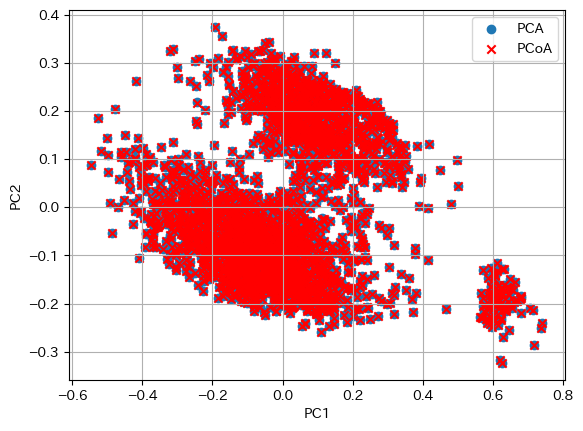

In [20]:
import plt
from skbio.stats.ordination import pcoa
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances

x, y = PCA(2).fit_transform(we).T
plt.scatter(x, y, label="PCA")

x, y = pcoa(euclidean_distances(we)).samples.values.T[:2]
plt.scatter(-x, y, c="r", marker="x", label="PCoA")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

/Users/yuji/.pyenv/versions/3.9.13/lib/python3.9/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -4.134964466094971 and the largest is 99.51473236083984.
  warn(


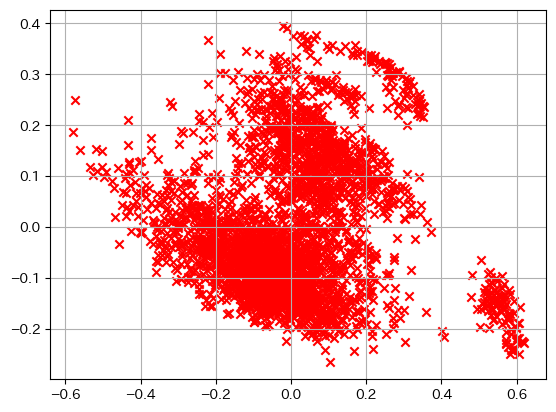

In [22]:
from sklearn.metrics.pairwise import cosine_distances

we -= we.mean(dim=0, keepdim=True)

x, y = pcoa(cosine_distances(we)).samples.values.T[:2]
plt.scatter(-x, y, c="r", marker="x", label="PCoA")

# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.legend()